In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("iris.data", delimiter=",",header=None, usecols=[0,1,2,3,4], names=["sepal_len", "sepal_width", "petal_len", "petal_width", "class"])
df.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
le = LabelEncoder
df["class_encoded"]= le.fit_transform(le,df["class"])
df["class_encoded"].value_counts()

class_encoded
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
x_values = df.drop(columns=["class","class_encoded"])
y_values =df["class_encoded"].values

x_train,x_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2)

In [15]:
print(x_values.shape)
print(y_values.shape)

(150, 4)
(150,)


In [16]:
model = Sequential([
    Dense(units = 10, activation = "relu"),
    Dense(units=10,activation ='relu'),
    Dense(units = 3, activation = 'linear')
]
)

In [17]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=["accuracy"]
)
history = model.fit(
    x_train,y_train,epochs = 100
)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.2980 - accuracy: 0.3250
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0630 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9662 - accuracy: 0.6083
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8883 - accuracy: 0.6583
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8211 - accuracy: 0.6417
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7641 - accuracy: 0.6917
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7106 - accuracy: 0.6750
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6570 - accuracy: 0.7000
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6180 - accuracy: 0.7833
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5734 - accuracy: 0.8167
Epoch 11/100
4/4 [===========

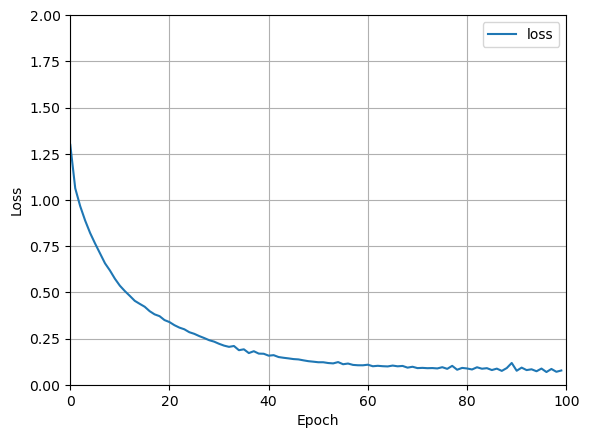

In [18]:
fig, ax =plt.subplots(1,1)
ax.plot(history.history["loss"],label="loss")
ax.set_ylim([0,2])
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_xlim([0,100])
ax.legend()
ax.grid(True)

In [104]:
loss, accuracy = model.evaluate(x_test,y_test)
print("accuracy :", accuracy*100)

1/1 [==============================] - 0s 47ms/step - loss: 0.0618 - accuracy: 1.0000
accuracy : 100.0
